In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the CSV file
CSV_PATH = "/content/drive/MyDrive/ML/ml_data/housing.csv"
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv(CSV_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
#Droping Null values
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
data.ocean_proximity.value_counts()
data=data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1) #does one-hot encoding for the categorical column ocean_proximity.
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [6]:
#splitting training and testing data(80:20)
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

train_data = x_train.join(y_train)
test_data = pd.concat([x_test, y_test], axis=1)

In [7]:
#LOG transformation :fix distribution shape, reduce skewness, and handle extreme outliers.
#train_data.hist(figsize=(15,8))
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)
#train_data.hist(figsize=(15,8))
#also use the histograph to see before and after effect of transformation

<Axes: >

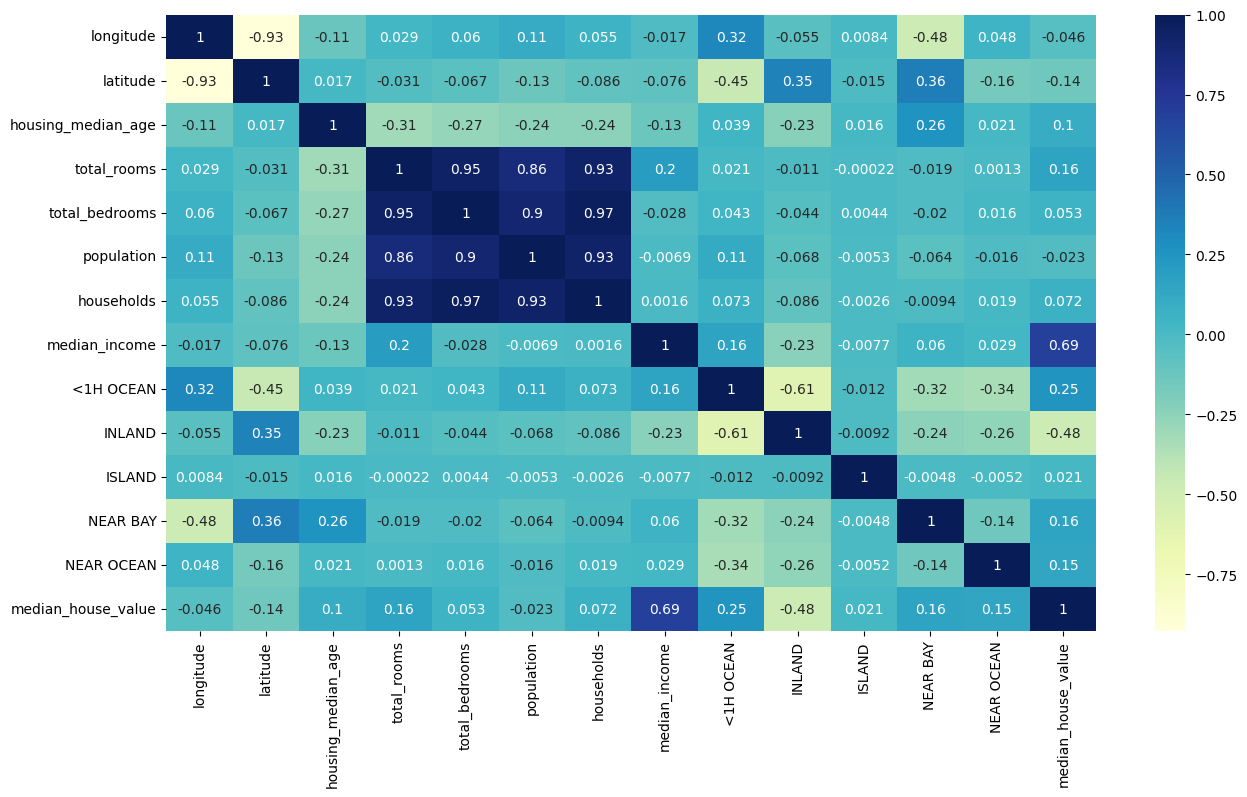

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

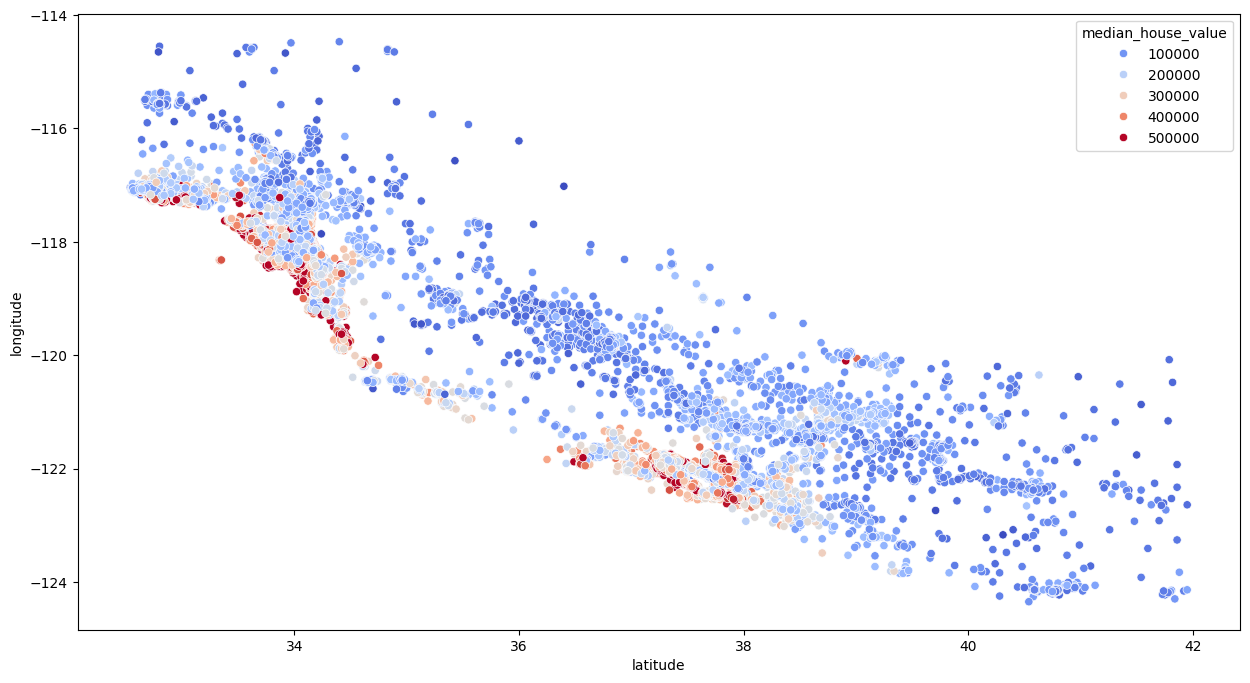

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [10]:
#feature engineering
#Raw columns like total_rooms, total_bedrooms, or households can be misleading because they scale with population size. Ratios like these normalize the data and make features more meaningful to the model.
train_data['bedroom_ratio']=train_data["total_bedrooms"]/train_data['total_rooms'] #This gives the fraction of bedrooms out of total rooms in a block.
train_data['household_rooms']=train_data['total_rooms']/train_data['households']#This gives the average number of rooms per household.

**USING sklearn first**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Features and target
X = train_data.drop(['median_house_value'], axis=1)
y = train_data['median_house_value']

# Standardize X only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit regression
reg = LinearRegression()
reg.fit(X_scaled, y)

# Predictions (already in dollar scale)
y_pred = reg.predict(X_scaled)


In [12]:


# Apply same log transformation
for col in ["total_rooms", "total_bedrooms", "population", "households"]:
    test_data[col] = np.log(test_data[col] + 1)

test_data['bedroom_ratio']=test_data["total_bedrooms"]/test_data['total_rooms'] #This gives the fraction of bedrooms out of total rooms in a block.
test_data['household_rooms']=test_data['total_rooms']/test_data['households']
X_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Predictions
y_train_pred = reg.predict(X_scaled)       # Training predictions
y_test_pred  = reg.predict(X_test_scaled)  # Test predictions

# Evaluation function
def evaluate(y_true, y_pred, label="DATA"):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)

    print(f"\n{label} METRICS:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")

# Evaluate Training
evaluate(y_train, y_train_pred, "TRAIN")

# Evaluate Test
evaluate(y_test, y_test_pred, "TEST")



TRAIN METRICS:
MSE: 4369024654.93334
RMSE: 66098.59798008835
R²: 0.6709274061370005
MAE: 47843.89034970406

TEST METRICS:
MSE: 4448415629.070743
RMSE: 66696.44390123617
R²: 0.6708857437067028
MAE: 47502.04581661151


# Normal Equation Implementaion
# θ=(XᵀX)⁻¹ Xᵀy

In [17]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# -----------------------------
# Data preparation
# -----------------------------
# Features and target
X = train_data.drop(['median_house_value'], axis=1)
y = train_data['median_house_value']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Add bias column
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# -----------------------------
# Normal Equation
# -----------------------------
theta_best = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

print("Theta (coefficients):")
print(theta_best)

# Predictions
y_train_pred = X_b @ theta_best
y_test_pred  = X_test_b @ theta_best

# -----------------------------
# Evaluation function
# -----------------------------
def evaluate(y_true, y_pred, label="DATA"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"\n{label} METRICS:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")

# -----------------------------
# Evaluate train and test
# -----------------------------
evaluate(y_train, y_train_pred, "TRAIN")
evaluate(y_test, y_test_pred, "TEST")


Theta (coefficients):
[206756.43882295 -58406.03720524 -60176.74422798  14124.64743528
 -63740.12521998 104869.55175267 -64277.30826122  34056.51769776
  80835.60329316   5839.45309091  -9601.14416796   1911.76861978
    493.43836837   4130.27539089 -13440.88359681    236.63980539]

TRAIN METRICS:
MSE: 4369024654.93334
RMSE: 66098.59798008835
R²: 0.6709274061370005
MAE: 47843.89034970409

TEST METRICS:
MSE: 4448415629.0707445
RMSE: 66696.44390123618
R²: 0.6708857437067026
MAE: 47502.045816611564


# Gradient Decent


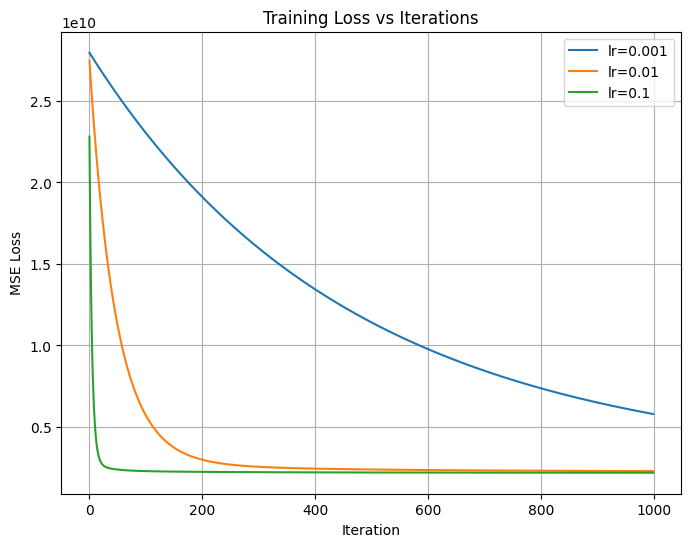


TRAIN METRICS:
MSE: 4587374688.817142
RMSE: 67730.1608503711
R²: 0.6544813986879278
MAE: 48944.40603255217

TEST METRICS:
MSE: 4748206479.971252
RMSE: 68907.23097013297
R²: 0.6487058371591065
MAE: 49018.633335400846


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# -----------------------------
# Gradient Descent Class
# -----------------------------
class LinearRegressionGD:
    def __init__(self, lr=0.01, n_iterations=1000, tol=None):
        self.lr = lr
        self.n_iterations = n_iterations
        self.tol = tol
        self.theta = None
        self.loss_history = []
        self.theta_history = []

    def mse_loss(self, X, y):
        m = X.shape[0]
        y_pred = X @ self.theta
        return (1/(2*m)) * np.sum((y_pred - y)**2)

    def fit(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0],1)), X]
        m, n = X_b.shape
        self.theta = np.zeros((n,1))
        y = y.values.reshape(-1,1) if isinstance(y, pd.Series) else y.reshape(-1,1)

        for i in range(self.n_iterations):
            gradients = (1/m) * X_b.T @ (X_b @ self.theta - y)
            self.theta -= self.lr * gradients
            self.theta_history.append(self.theta.copy())
            loss = self.mse_loss(X_b, y)
            self.loss_history.append(loss)

            if self.tol is not None and i > 0:
                if abs(self.loss_history[-2] - self.loss_history[-1]) < self.tol:
                    print(f"Early stopping at iteration {i}")
                    break

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0],1)), X]
        return X_b @ self.theta

# -----------------------------
# Train GD with multiple learning rates
# -----------------------------
learning_rates = [0.001, 0.01, 0.1]
models = {}

for lr in learning_rates:
    model = LinearRegressionGD(lr=lr, n_iterations=1000, tol=1e-6)
    model.fit(X_scaled, y_train)
    models[lr] = model

# -----------------------------
# Plot Training Loss
# -----------------------------
plt.figure(figsize=(8,6))
for lr, model in models.items():
    plt.plot(model.loss_history, label=f"lr={lr}")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Training Loss vs Iterations")
plt.legend()
plt.grid(True)
plt.savefig("loss_vs_iterations.png", dpi=300)
plt.savefig("loss_vs_iterations.pdf")
plt.show()

# -----------------------------
# Evaluate on Train/Test
# -----------------------------
def evaluate(y_true, y_pred, label="DATA"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = 1 - np.sum((y_true - y_pred.flatten())**2)/np.sum((y_true - np.mean(y_true))**2)
    mae = np.mean(np.abs(y_true - y_pred.flatten()))
    print(f"\n{label} METRICS:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")

best_model = models[0.01]
y_train_pred = best_model.predict(X_scaled)
y_test_pred  = best_model.predict(X_test_scaled)

evaluate(y_train, y_train_pred, "TRAIN")
evaluate(y_test, y_test_pred, "TEST")


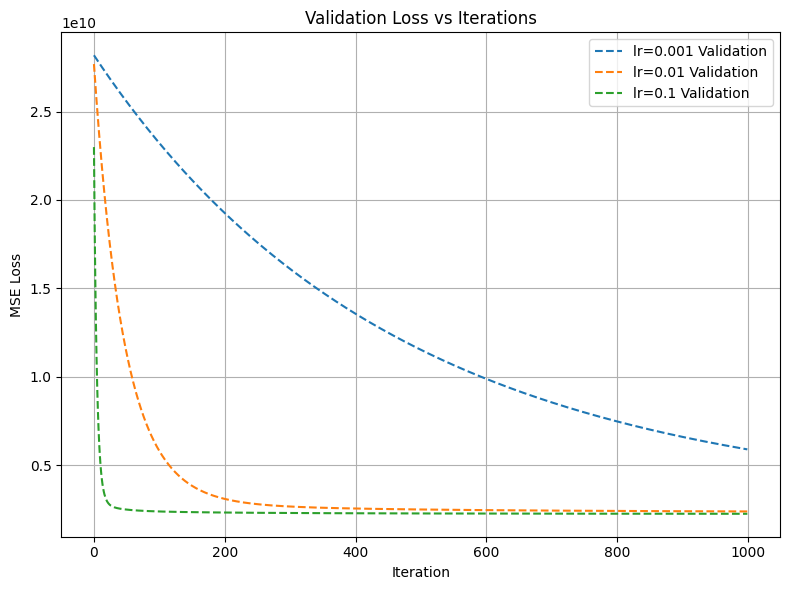

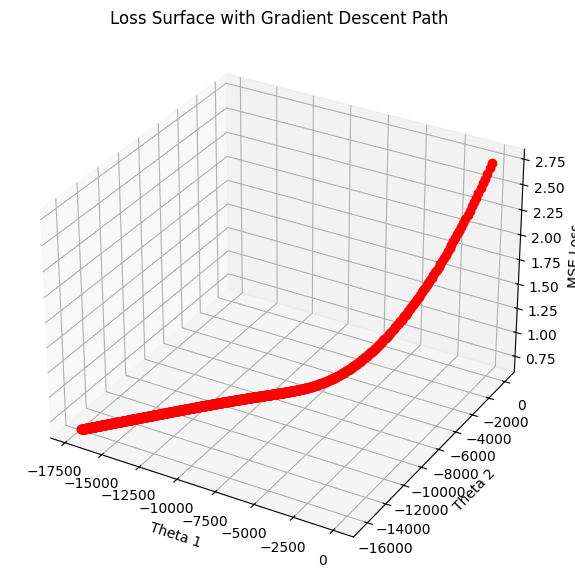

In [16]:
# -----------------------------
# 1️⃣ Validation Loss vs Iterations
# -----------------------------
plt.figure(figsize=(8,6))

for lr, model in models.items():
    X_te_b = np.c_[np.ones((X_test_scaled.shape[0],1)), X_test_scaled]
    val_loss = []
    for theta in model.theta_history:
        y_pred_val = X_te_b @ theta
        loss = (1/(2*X_te_b.shape[0])) * np.sum((y_pred_val - y_test.values.reshape(-1,1))**2)
        val_loss.append(loss)
    plt.plot(val_loss, '--', label=f"lr={lr} Validation")

plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Validation Loss vs Iterations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("validation_loss_vs_iterations.png", dpi=300)
plt.savefig("validation_loss_vs_iterations.pdf")
plt.show()

# -----------------------------
# 2️⃣ Optional: 3D Loss Surface (First 2 Features)
# -----------------------------
from mpl_toolkits.mplot3d import Axes3D

X2D = X_scaled[:, :2]
X2D_b = np.c_[np.ones((X2D.shape[0],1)), X2D]
y_train_reshaped = y_train.values.reshape(-1,1)

x1_range = np.linspace(-3, 3, 50)
x2_range = np.linspace(-3, 3, 50)
X1, X2 = np.meshgrid(x1_range, x2_range)
Loss_surface = np.zeros_like(X1)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        theta = np.array([[0], [X1[i,j]], [X2[i,j]]])
        y_pred = X2D_b @ theta
        Loss_surface[i,j] = (1/(2*X2D_b.shape[0])) * np.sum((y_pred - y_train_reshaped)**2)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Loss_surface, cmap='viridis', alpha=0.8)

# Overlay gradient descent path for lr=0.01
theta_path = np.array([t[:3].flatten() for t in models[0.01].theta_history])
ax.plot(theta_path[:,1], theta_path[:,2],
        [(1/(2*X2D_b.shape[0])) * np.sum((X2D_b @ t.reshape(-1,1) - y_train_reshaped)**2) for t in theta_path],
        color='red', marker='o', label='GD Path')

ax.set_xlabel("Theta 1")
ax.set_ylabel("Theta 2")
ax.set_zlabel("MSE Loss")
ax.set_title("Loss Surface with Gradient Descent Path")
plt.savefig("loss_surface_3d.png", dpi=300)
plt.savefig("loss_surface_3d.pdf")
plt.show()



# COMPARISION BETWEEN METRICS

| Implementation           | Dataset | MSE              | RMSE      | R²     | MAE       |
| ------------------------ | ------- | ---------------- | --------- | ------ | --------- |
| Sklearn LinearRegression | Train   | 4,369,024,654.93 | 66,098.60 | 0.6709 | 47,843.89 |
|                          | Test    | 4,448,415,629.07 | 66,696.44 | 0.6709 | 47,502.05 |
| Normal Equation          | Train   | 4,369,024,654.93 | 66,098.60 | 0.6709 | 47,843.89 |
|                          | Test    | 4,448,415,629.07 | 66,696.44 | 0.6709 | 47,502.05 |
| Gradient Descent         | Train   | 4,587,374,688.82 | 67,730.16 | 0.6545 | 48,944.41 |
|                          | Test    | 4,748,206,479.97 | 68,907.23 | 0.6487 | 49,018.63 |



**Observations:**

Sklearn and Normal Equation match almost exactly, as expected, because both compute the closed-form solution.

Gradient Descent is slightly worse — likely due to learning rate, number of iterations, and numerical precision.

All three methods give reasonably close predictions, confirming correctness of your implementations.
